# Experiments on Sequential and Optim

In [60]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [61]:
from pyldl.activations import Sigmoid, Tanh
from pyldl.layers import Sequential
from pyldl.losses import MSELoss
from pyldl.modules import Linear
from pyldl.optimizers import SGD
from pyldl.utils import gen_arti, plot_data, plot_frontiere

## Regression

In [62]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, noise=1)
y = y.reshape(-1, 1)

In [63]:
in_features = X.shape[1]
out_features = 1

network = Sequential(Linear(in_features, out_features))
loss = MSELoss()

In [64]:
SGD(network, loss, X, y, batch_size=X.shape[0], gradient_step=1e-4, n_iter=500)

100%|██████████| 500/500 [00:00<00:00, 45412.56it/s]


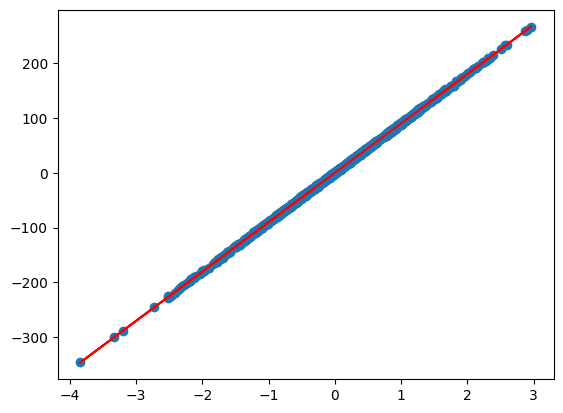

In [65]:
import matplotlib.pyplot as plt

yhat = network.forward(X)
plt.scatter(X, y)
plt.plot(X, yhat, color="red")
plt.show()

## Binary Classification

In [66]:
import numpy as np

X, y = gen_arti(sigma=0.1, nbex=5000, data_type=1, epsilon=0.02)
y = np.where(y == -1, 0, 1)

In [67]:
network = Sequential(Linear(X.shape[1], 8), Tanh(), Linear(8, 1), Sigmoid())
loss = MSELoss()

In [68]:
SGD(network, loss, X, y, batch_size=X.shape[0], gradient_step=1e-3, n_iter=1000)

100%|██████████| 1000/1000 [00:01<00:00, 814.53it/s]


In [69]:
def predict(X):
    z = network(X)
    return np.where(z > 0.5, 1, 0)

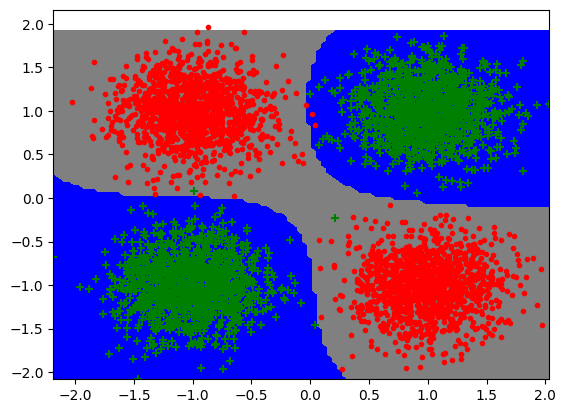

In [70]:
plot_frontiere(X, predict, step=100)
plot_data(X, y)